In [1]:
%cd ..

/home/jairo/Documentos/GitHub/parallel-kink-scattering


/home/jairo/Documentos/GitHub/parallel-kink-scattering/.env/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from modules.numeric import *
from findiff import FinDiff

from modules.plotting import *
cmap = get_cmap()

In [3]:
L = 50
N = 1000
dx = 2*L/N
dt = 0.7*dx
x = (-L, L, dx)

In [4]:
lamb = 1
x0 = 10*Kink.delta(lamb)/2
collider = KinkCollider(x, x0s=(-x0, x0), dt=dt, order=4)
collider.D2x = FinDiff((0, dx, 2), acc=4).matrix((N+4, )).toarray()

In [72]:
v = 0.1923
lat, Y = collider.collide(vs=(v, -v), lamb=lamb, t_final=x0/v + 2*L, callback=KinkCollider.neumann_boundary(30, y=None, dy=None))

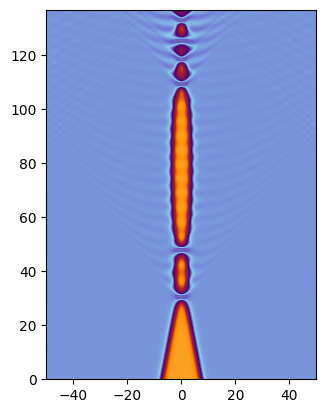

In [73]:
plt.imshow(Y[:, 0], extent=(lat.x.min(), lat.x.max(), lat.t.min(), lat.t.max()), cmap=cmap, vmin=-2, vmax=2, origin='lower')
plt.show()

In [92]:
v = 0.7
lat, Y = collider.collide(vs=(0.9, 0), lamb=lamb, t_final=x0/v + 2*L, callback=KinkCollider.neumann_boundary(3, y=-1, dy=0))

/home/jairo/Documentos/GitHub/parallel-kink-scattering/modules/numeric.py:268: RuntimeWarning: overflow encountered in square
  self.D2x.dot(y) + lamb*y*(1 - y**2) # = ddy(t)
/home/jairo/Documentos/GitHub/parallel-kink-scattering/modules/numeric.py:268: RuntimeWarning: invalid value encountered in add
  self.D2x.dot(y) + lamb*y*(1 - y**2) # = ddy(t)


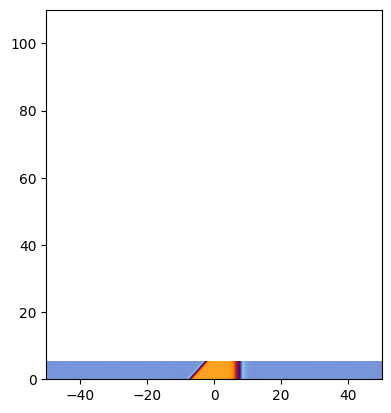

In [93]:
plt.imshow(Y[:, 0], extent=(lat.x.min(), lat.x.max(), lat.t.min(), lat.t.max()), cmap=cmap, vmin=-2, vmax=2, origin='lower')
plt.show()

In [1]:
C = diff_coeffs(2, (-2, -1, 0, 1, 2))
C

NameError: name 'diff_coeffs' is not defined

In [5]:
N = 1000
y = np.random.rand(N)

In [6]:
M = np.r_[[
    np.pad(C, (i, N-i-len(C)))
    for i in range(N-len(C)+1)
]]
M.shape

(996, 1000)

In [7]:
from matplotlib import colors

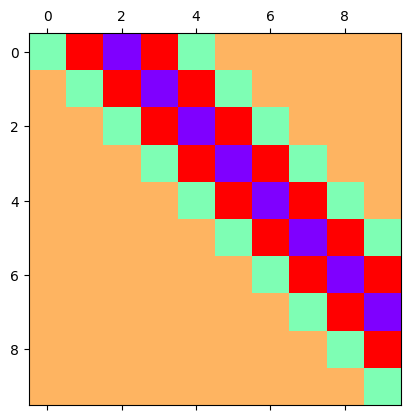

In [8]:
plt.matshow(M[:10, :10], norm=colors.BoundaryNorm(np.sort(np.r_[C, 0]), plt.get_cmap().N), cmap='rainbow')

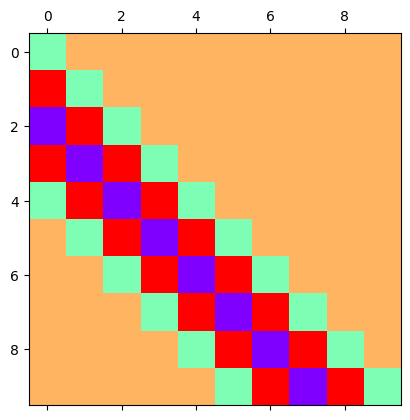

In [9]:
plt.matshow(M[-10:, -10:], norm=colors.BoundaryNorm(np.sort(np.r_[C, 0]), plt.get_cmap().N), cmap='rainbow')

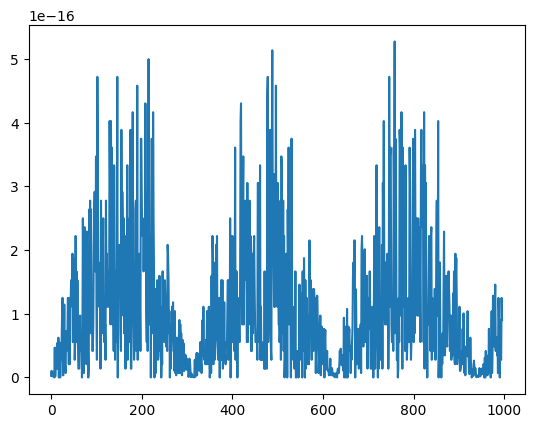

In [10]:
y = np.sin(np.linspace(0, 10, N))
plt.plot(np.abs(M.dot(y) - np.convolve(y, C, mode='valid')))

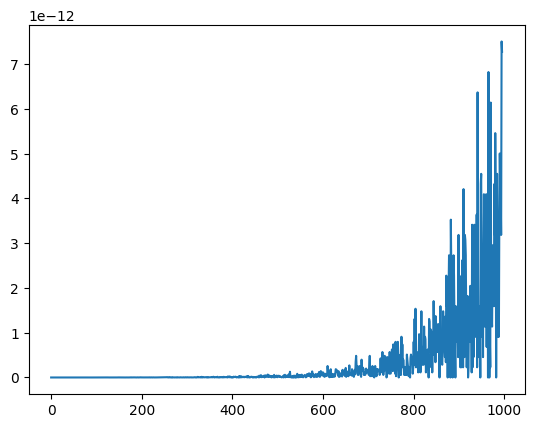

In [11]:
y = np.exp(np.linspace(0, 10, N))
plt.plot(np.abs(M.dot(y) - np.convolve(y, C, mode='valid')))

In [12]:
from time import time

In [13]:
t_dot = []
t_conv = []

Ns = np.arange(100, 20000, 100)
for i, N in enumerate(Ns):
    M = np.r_[[
        np.pad(C, (i, N-i-len(C)))
        for i in range(N-len(C)+1)
    ]]
    y = np.random.rand(N)

    m_dot = []
    m_conv = []
    for _ in range(10):
        tic = time()
        M.dot(y)
        tac = time()
        m_dot.append(tac-tic)

        tic = time()
        np.convolve(y, C)
        tac = time()
        m_conv.append(tac-tic)
    t_dot.append((np.mean(m_dot), np.std(m_dot)))
    t_conv.append((np.mean(m_conv), np.std(m_conv)))

t_dot = np.r_[t_dot]
t_conv = np.r_[t_conv]

: 

<ErrorbarContainer object of 3 artists>

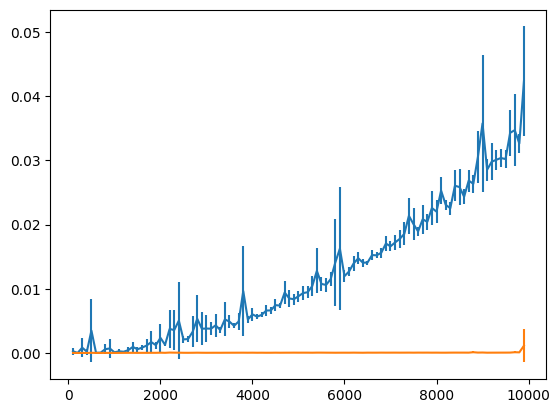

In [ ]:
plt.errorbar(Ns, t_dot[:, 0], t_dot[:, 1])
plt.errorbar(Ns, t_conv[:, 0], t_conv[:, 1])
# plt.semilogy()

[]

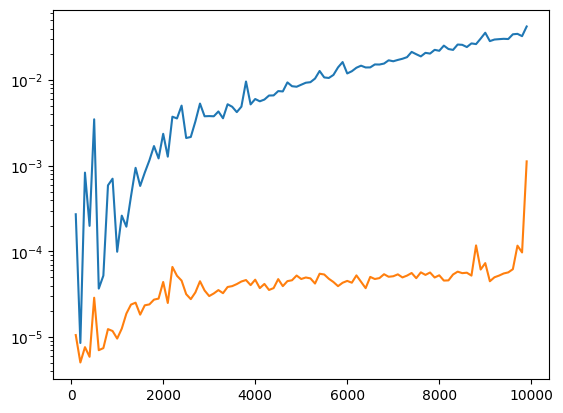

In [ ]:
plt.plot(Ns, t_dot[:, 0])
plt.plot(Ns, t_conv[:, 0])
plt.semilogy()